In [2]:
# Calculate averages
import random
import matplotlib.pyplot as plt

In [3]:
x = [random.random() for _ in range(10)]
sum(x) / len(x)

0.4085268127498625

In [4]:
# Simulating the average
%whos

Variable   Type      Data/Info
------------------------------
plt        module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
random     module    <module 'random' from '/o<...>ib/python3.13/random.py'>
x          list      n=10


## Uniform Random Numbers & Distribution

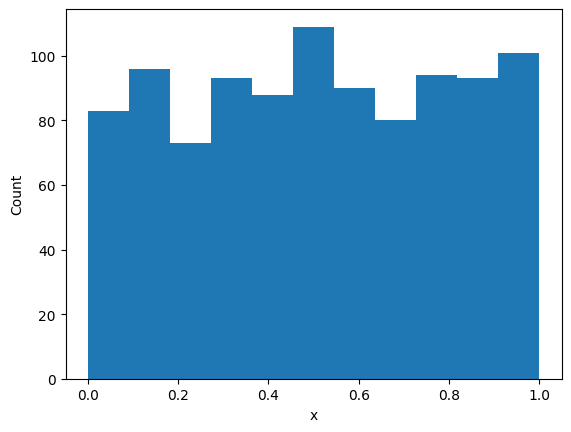

In [5]:
## Uniform random numbers & distribution
random.seed(2100)
xu_1000 = [random.random() for _ in range(1000)]
plt.hist(xu_1000, bins=11)
plt.xlabel('x')
plt.ylabel('Count')
plt.show()

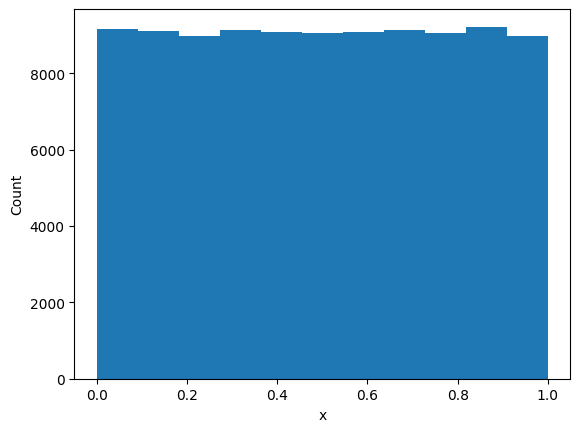

In [6]:
plt.hist([random.random() for _ in range(100000)], bins=11)
plt.xlabel('x')
plt.ylabel('Count')
plt.show()

In [7]:
def my_ave(x):
    return sum(x) / len(x)
random.seed(2100)
round(my_ave([random.random() for _ in range(100000000)]), 4)

0.5

## Standard Error of the Mean (SEM)
SEM quantifies how much averages are expected to vary from the true population average and provides a way to measure confidence in an estimate

In [8]:
## Simulate the variablity of the average
# 1. Generate a sequence of random number from an assumed distribution
# 2. Calculate the average of the sequence

In [9]:
def my_ave(x):
    return sum(x) / len(x)

def gen_samples_calc_avg(N):
    """Assume we are generating values from a Uniform distribution between 0 and 1"""
    return my_ave([random.random() for _ in range(N)])

In [10]:
random.seed(2100)
print(gen_samples_calc_avg(10))
print(gen_samples_calc_avg(10))
print(gen_samples_calc_avg(10))

0.4762833378575168
0.5500077940846836
0.5807803000152741


## Average of Averages - Bell Curve

In [11]:
random.seed(2100)
xbar_sim_N05_R1000 = [gen_samples_calc_avg(5) for _ in range(1000)]
# xbar - sample average
# sim - simulation
# N05 - sample size 5
# R1000 - 1000 replications

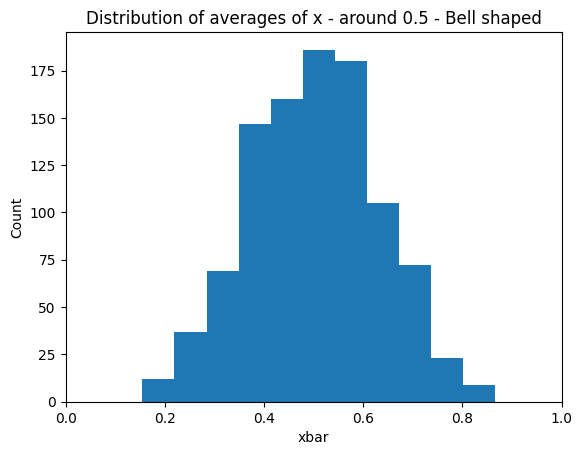

In [12]:
# xbar_sim_N05_R1000 is a list of sample (a sample is a list of heights of students in a single day) averages.
# Lets visualize the distribution of these sample averages using a histogram
plt.hist(xbar_sim_N05_R1000, bins=11)
# label the entire plot with a descriptive title
plt.title('Distribution of averages of x - around 0.5 - Bell shaped')
plt.xlabel('xbar') # distribution of averages of x
plt.ylabel('Count')
plt.xlim(0, 1) # set x-axis limits to 0 and 1
plt.show()

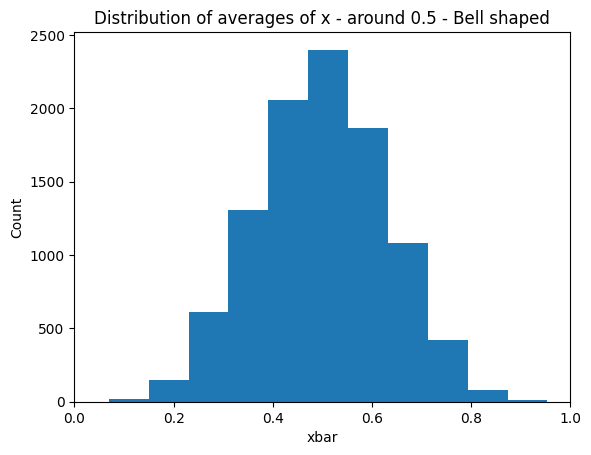

In [13]:
random.seed(2100)
xbar_sim_N05_R10000 = [gen_samples_calc_avg(5) for _ in range(10000)]
plt.hist(xbar_sim_N05_R10000, bins=11)
plt.title('Distribution of averages of x - around 0.5 - Bell shaped')
plt.xlabel('xbar')
plt.ylabel('Count')
plt.xlim(0, 1)
plt.show()

## Distribution of the Average based on the Number of Replications

In [14]:
num_replications = [ 5 * (2 ** ix) for ix in range(12)]
num_replications

[5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]

In [15]:
# Looking at increasingly larger number of replications
for i, v in enumerate(num_replications):
    print(i, v)

0 5
1 10
2 20
3 40
4 80
5 160
6 320
7 640
8 1280
9 2560
10 5120
11 10240


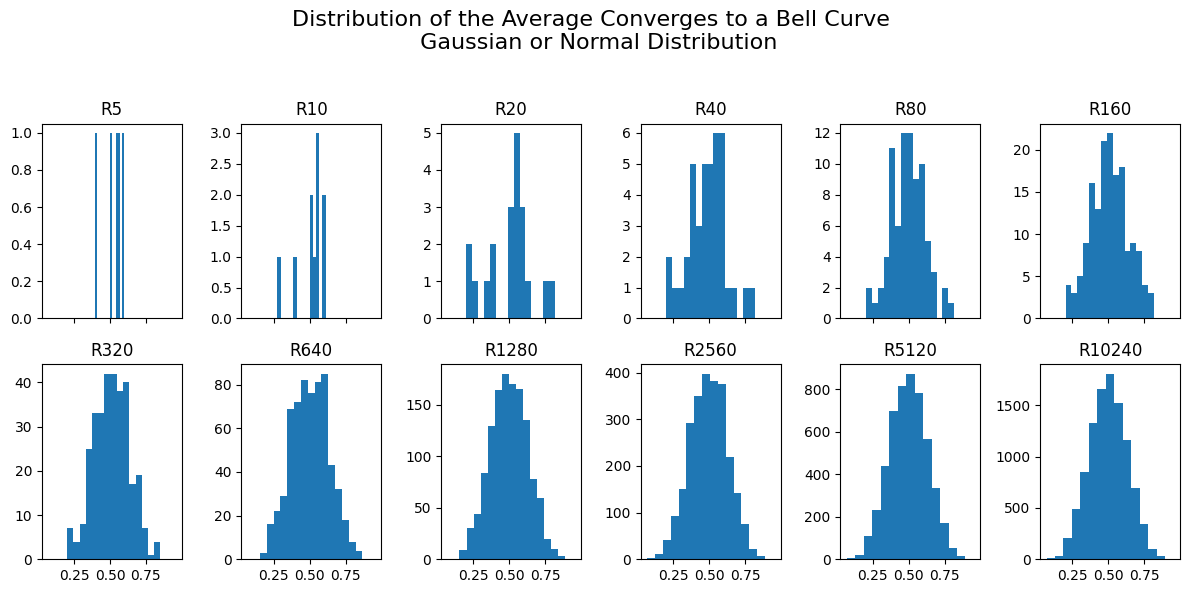

In [16]:
fig, axs = plt.subplots(2, 6, figsize=(12, 6), sharex=True, sharey=False)
# Add a title to the entire figure
fig.suptitle("Distribution of the Average Converges to a Bell Curve \n Gaussian or Normal Distribution", fontsize=16)
axs = axs.ravel()
for i, nr in enumerate(num_replications):
    random.seed(2100)
    axs[i].hist([gen_samples_calc_avg(5) for _ in range(nr)], density=False, bins=15)
    axs[i].set_title(f'R{nr}')

#Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Central Limit Theorem (CLT)
- The distribution of the averages is converting to a Normal distribution. 

### Variance - A Measur of Variability - The width of the Bell Curve

1. Central Limit Theorem (CLT)
- The CLT states that the distribution of a sample statistic (e.g., average), calculated repeatedly from a population, approaches a Gaussian (normal) distribution as the number of replications increases.
- Even if the data comes from a non-Gaussian distribution (e.g., uniform), the distribution of the sample averages will form a bell curve.
- Practical Example:
  - Sampling 5 numbers repeatedly from a uniform distribution (0–1) and calculating their average will yield a Gaussian distribution of those averages.
2. Variance
- Variance measures the spread or variability of data points around the mean.
- Variance is particularly meaningful for Gaussian distributions, as it describes the width of the bell curve:
  - Smaller variance = Narrower curve (less variability).
  - Larger variance = Wider curve (more variability).
3. Formula for Sample Variance
$$ s^2 = \frac{1}{N-1} \sum_{n=1}^{N} \left( \left(x_n - \bar{x}\right)^2 \right) $$

---

## Steps to Compute Variance - The Mean Squared Deviation from the Average

### 1. Calculate the Sample Average: How far from the average you are
$$ \bar{x} = \frac{\sum x_i}{n} $$

### 2. Calculate Deviations:
Subtract the sample average from each data point:
$$
x_i - \bar{x}
$$

### 3. Square Deviations:
Square each deviation to avoid negative values:
$$
(x_i - \bar{x})^2
$$

### 4. Sum Squared Deviations:
Sum all squared deviations:
$$
\sum (x_i - \bar{x})^2
$$

### 5. Divide by \(n-1\):
Normalize the total squared deviation by dividing by \(n-1\) (degrees of freedom):
$$
S^2 = \frac{\sum (x_i - \bar{x})^2}{n-1}
$$


In [17]:
def my_variance(x):
    xbar = my_ave(x)
    squared_deviation = [(xi - xbar) ** 2 for xi in x]
    return sum(squared_deviation) / (len(x) - 1)

print(my_variance([1, 2, 3]))
print(my_variance([5, 10, 15]))

1.0
25.0


## What is the Variance of the Average? 

In [18]:
my_variance(xbar_sim_N05_R10000) # average variability - variance of the sample averages

0.016879961620988537

## Standard Deviation (S)
The Standard Deviation is the (half) width of the bell curve. 
The Standard Deviation is the Square Root of the variance
Or the Variance is the Standard Deviation Squared

Basically Standard Deviation is a more intutitive way to explain data variation around the mean (variance). 

**S^2** (Variance) = 4 => Variance is 4 which are not units of the original measurements (i.e. heights)

**S** (SD) = 2 => Standar Deviation in the dataset is 2 inches - meaning most people's heights in that dataset are within 2 inches difference

In [19]:
def my_sd(x):
    return my_variance(x) ** 0.5

my_sd(xbar_sim_N05_R10000) # standard deviation of the sample averages

0.12992290645220547

---
## Variability Based On Different Sample Sizes

- For different sample sizes create replicas 2500 to ensure we roughly have a normal distribution for the sample average

In [20]:
sample_size_study = [3 * (2 ** ix) for ix in range(15)]
sample_size_study

[3, 6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072, 6144, 12288, 24576, 49152]

In [21]:
random.seed(2100)
# this is the opposite of the previous study:
# - we are fixing the sample size and increasing the number of replications
# - instead of fixing the number of replications and increasing the sample size
study_sd_vs_sample_size = [my_sd([gen_samples_calc_avg(n) for _ in range(2500)]) for n in sample_size_study]

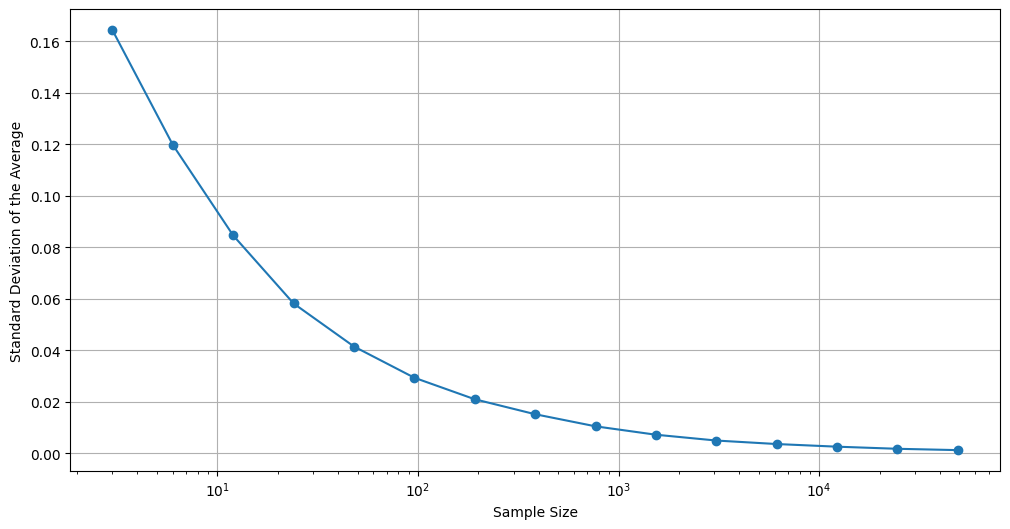

In [22]:
# Show the standard deviation of the average as a function of (with respect to) the sample size
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sample_size_study, study_sd_vs_sample_size, 'o-')
ax.set_xscale('log')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Standard Deviation of the Average')
ax.grid(True)

plt.show()


### Conclusions
- SD on the average decreases as the sample size increases
- SD on the average has a special name: **Standard Error On The Mean (SEM)**

# Theory of the Standard Error of the Mean (SEM)

The **Standard Error of the Mean (SEM)** quantifies how much the sample mean (\(\bar{x}\)) is expected to vary from the true population mean (\(\mu\)) when multiple samples are taken.

---

## 1. Variance of the Sample Mean
The variance of the sample mean (\(\text{Var}(\bar{x})\)) is related to the population variance (\(\sigma^2\)) and the sample size (\(n\)):

$$
\text{Var}(\bar{x}) = \frac{\sigma^2}{n}
$$

- \(\sigma^2\): Variance of the population.
- \(n\): Number of observations in the sample.

---

## 2. Standard Error of the Mean
The **Standard Error of the Mean (SEM)** is the square root of the variance of the sample mean:

$$
SEM = \sqrt{\text{Var}(\bar{x})} = \sqrt{\frac{\sigma^2}{n}}
$$

This can also be expressed as:

$$
SEM = \frac{\sigma}{\sqrt{n}}
$$

- As \(n\) increases, \(SEM\) decreases, meaning the sample mean becomes more precise.

---

## 3. Special Case: Uniform Distribution
If the population follows a **uniform distribution** between \(a\) (lower bound) and \(b\) (upper bound), the variance of the population (\(\sigma^2\)) is given by:

$$
\sigma^2 = \frac{(b - a)^2}{12}
$$

For a uniform distribution between 0 and 1 (\(a = 0\), \(b = 1\)):

$$
\sigma^2 = \frac{(1 - 0)^2}{12} = \frac{1}{12}
$$

The standard deviation (\(\sigma\)) is the square root of the variance:

$$
\sigma = \sqrt{\frac{1}{12}} = \frac{1}{\sqrt{12}}
$$

---

## 4. SEM for a Uniform Distribution
Substituting \(\sigma = \frac{1}{\sqrt{12}}\) into the SEM formula:

$$
SEM = \frac{\sigma}{\sqrt{n}} = \frac{\frac{1}{\sqrt{12}}}{\sqrt{n}} = \frac{1}{\sqrt{12} \cdot \sqrt{n}}
$$

This can also be written as:

$$
SEM = \sqrt{\frac{1}{12n}}
$$

---

## 5. Interpretation of SEM
- The **Standard Error of the Mean** decreases as \(n\) increases.
- The rate of decrease slows down because SEM is proportional to \(\frac{1}{\sqrt{n}}\), not \(\frac{1}{n}\).



In [23]:
sem_theory = [ ((1/12)/n)**0.5 for n in sample_size_study]
print(len(sem_theory))

15


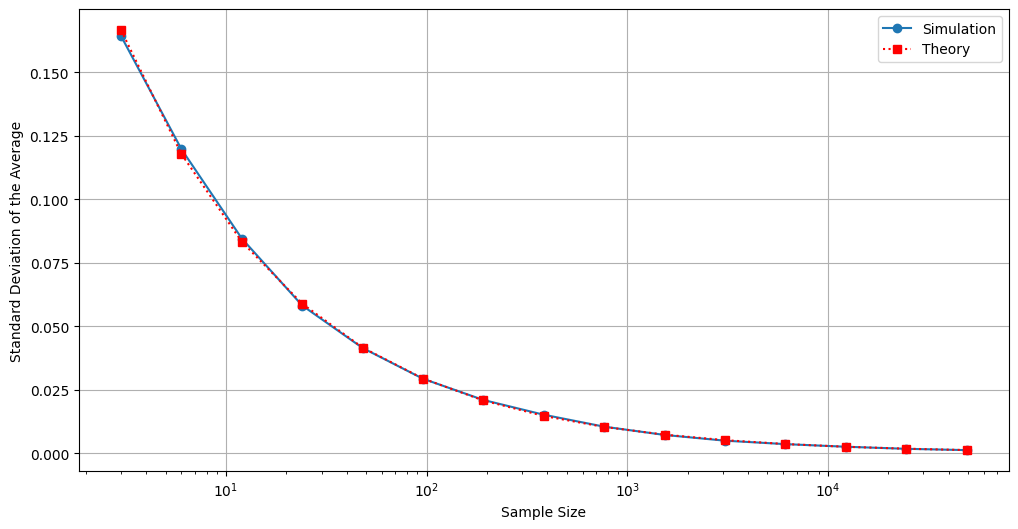

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sample_size_study, study_sd_vs_sample_size, 'o-', label='Simulation')
ax.plot(sample_size_study, sem_theory, ':sr', label='Theory')
ax.set_xscale('log')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Standard Deviation of the Average')
ax.grid(True)
ax.legend()

plt.show()

## Using Other Distributions
So far everything we have analyzied have been generated by random module for uniform distribution. Most of the distributions uphold the Central Limit Theorem, however, there are some that do not. Just be aware of this. 

For homework we need to use a different distribution - Gaussian (random.gauss(mu = 250, sigma= 20)):
- Generate distribution for a particular average (mu) and SD(sigma)

In [25]:
random.seed(2100)
yu = [random.random() for _ in range(5)]
print(yu)

[0.764021138054951, 0.4692037101382426, 0.09010549233469012, 0.08980190601697957, 0.5561956463771123]


In [26]:
sample_ave = my_ave(yu)
print(sample_ave)

0.3938655785843951


In [28]:
sample_sd = my_sd(yu)
print(sample_sd)

0.29739154752454966


In [30]:
sem = sample_sd / (len(yu) ** 0.5)
print(sem)

0.13299754323975047


In [33]:
conf_int = (sample_ave - 2 * sem, sample_ave + 2 * sem)
print(f"There is 95% chance that the population average is between {conf_int[0]:.4f} and {conf_int[1]:.4f}")

There is 95% chance that the population average is between 0.1279 and 0.6599


In [32]:
sample_ave

0.3938655785843951

In [35]:
random.seed(2100)
zu = [random.random() for _ in range(1000)]
sample_ave_z = my_ave(zu)
sample_sd_z = my_sd(zu)
sem_z = sample_sd_z / (len(zu) ** 0.5)
conf_int_z = (sample_ave_z - 2 * sem_z, sample_ave_z + 2 * sem_z)
print(f"There is 95% chance that the population average is between {conf_int_z[0]:.4f} and {conf_int_z[1]:.4f}")
print(f"Actual population average is {my_ave(zu):.4f}")


There is 95% chance that the population average is between 0.4940 and 0.5305
Actual population average is 0.5123


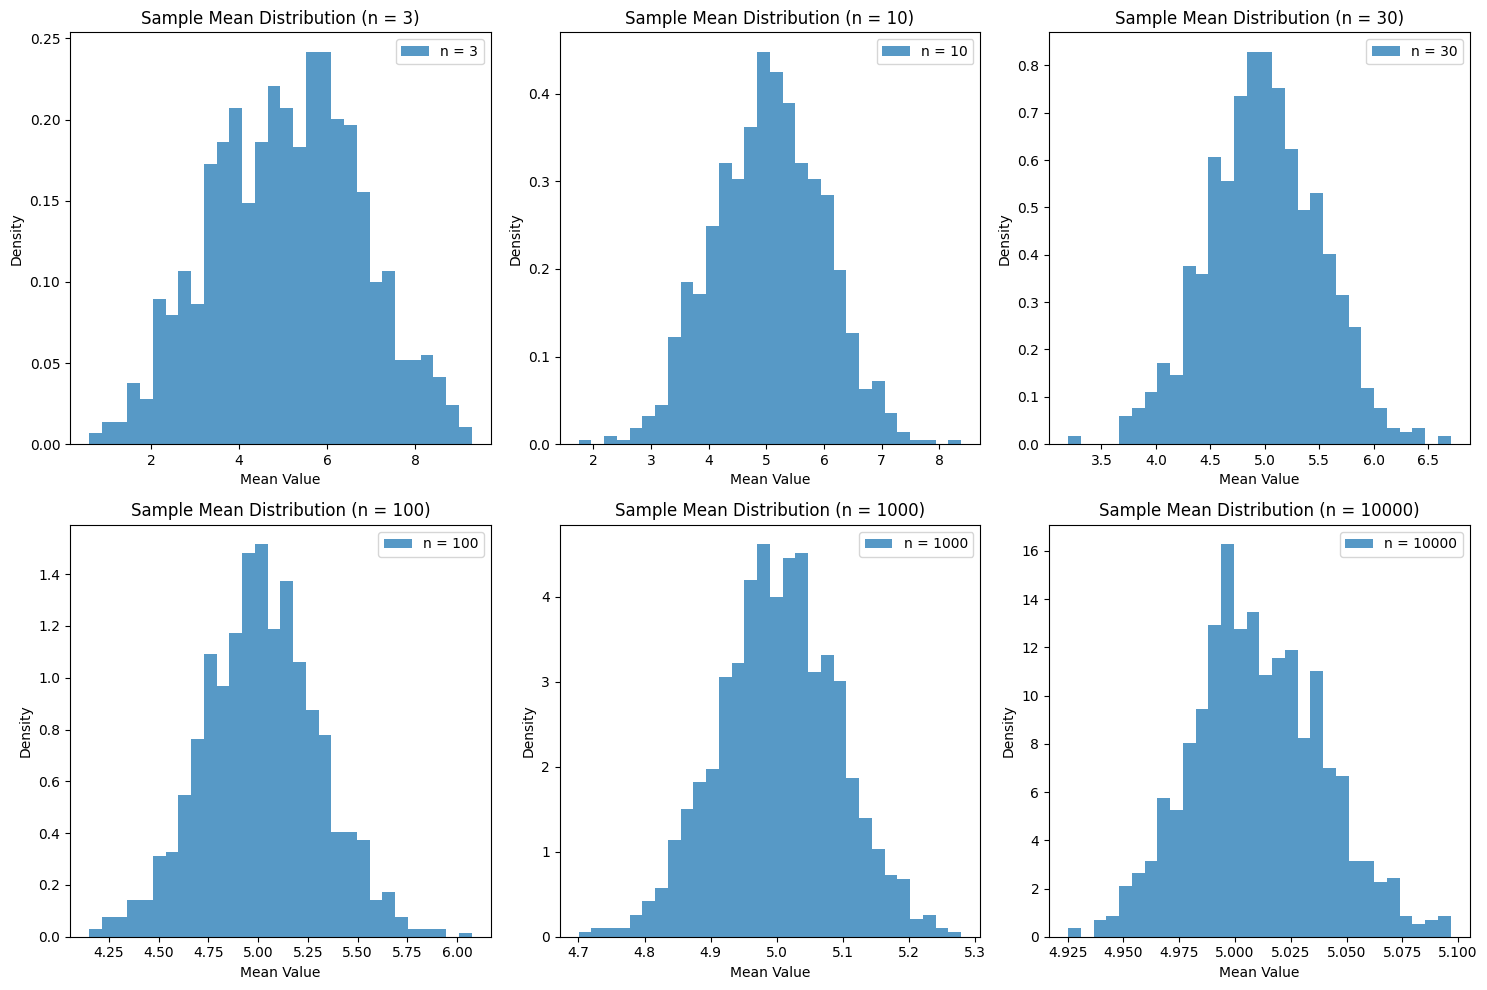

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data from a non-normal distribution (e.g., uniform)
population = np.random.uniform(0, 10, size=100000)

# Sample sizes
sample_sizes = [3, 10, 30, 100, 1000, 10000]

plt.figure(figsize=(15, 10))  # Adjust the figure size

# Determine the number of rows and columns for subplots
rows = 2
cols = 3

for i, n in enumerate(sample_sizes):
    # Generate sample means
    sample_means = [np.mean(np.random.choice(population, n)) for _ in range(1000)]
    plt.subplot(rows, cols, i + 1)  # Adjust for 6 subplots
    plt.hist(sample_means, bins=30, density=True, alpha=0.75, label=f'n = {n}')
    plt.title(f'Sample Mean Distribution (n = {n})')
    plt.xlabel('Mean Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

